In [61]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
x=df[['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
#print(y_train)
#print(y_test)

(537, 7)
(231, 7)


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [66]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
pre_ans=neigh.predict(X_test)
train_ans=neigh.predict(X_train)
#print(pre_ans)

In [67]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, pre_ans))

Accuracy Score: 0.7012987012987013


In [68]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_train, train_ans))

Accuracy Score: 0.8286778398510242


In [69]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pre_ans})
print(comparison.head(20))  # show first 20 comparisons


     Actual  Predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          1
204       0          0
97        0          0
336       0          0
568       0          1
148       0          1
667       1          0
212       0          1
199       1          0
265       0          0
760       0          0
356       1          1
501       0          0
457       0          0
604       1          1
213       1          0


In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pre_ans)
print(cm)   
#[[TN,FP],[FN,TP]]

[[119  32]
 [ 37  43]]


In [71]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, pre_ans, target_names=['No diabeties','diabeties'])
print(cr)


"""
accuracy=(TP+TN)/(TP+TN+FN+FP)
precision
    diab=>(TP)/(TP+FP)
    not diab=>(TN)/(TN+FN)
    macro avg= (0.75+0.66)/2
     Weighted avg=((0.75 * 349)+(0.66 * 189))/(349+189) 
    
Recall
    diab=>(TP)/(TP+FN)
    not diab=>(TN)/(TN+FP)
    
F1-Score= (2* (prec*recall))/(prec+recall)
support means occurences of class in dataset

 
 """ ;

              precision    recall  f1-score   support

No diabeties       0.76      0.79      0.78       151
   diabeties       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231



In [75]:
# Format: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigree, Age]
new_patient = np.array([[2, 120, 70, 79, 25.0, 0.5, 32],[7, 120, 90, 79, 2.0, 0.5, 32]])
sc=scaler.transform(new_patient)
prediction = neigh.predict(sc)
probability = neigh.predict_proba(sc)

for i in range(2):
    print("Prediction (0 = No diabetes, 1 = Diabetes):", prediction[i])
    print("Probability [No Diabetes, Diabetes]:", probability[i])

Prediction (0 = No diabetes, 1 = Diabetes): 0
Probability [No Diabetes, Diabetes]: [0.75 0.25]
Prediction (0 = No diabetes, 1 = Diabetes): 0
Probability [No Diabetes, Diabetes]: [0.875 0.125]


In [73]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
error_rate = []
precision_scores = []
recall_scores = []
accuracy_scores = []
for i in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    pre_ans=neigh.predict(X_test)
    error_rate.append(np.mean(pre_ans != y_test))  
    precision_scores.append(precision_score(y_test, pre_ans))
    recall_scores.append(recall_score(y_test, pre_ans))
    accuracy_scores.append(accuracy_score(y_test, pre_ans))
print(error_rate)

[0.3593073593073593, 0.3722943722943723, 0.3463203463203463, 0.30303030303030304, 0.2987012987012987, 0.2727272727272727, 0.27705627705627706, 0.2857142857142857, 0.2683982683982684, 0.26406926406926406, 0.2683982683982684, 0.2683982683982684, 0.2813852813852814, 0.26406926406926406, 0.2727272727272727, 0.26406926406926406, 0.24675324675324675, 0.2510822510822511, 0.24675324675324675, 0.2510822510822511, 0.24675324675324675, 0.24675324675324675, 0.2510822510822511, 0.24675324675324675]


Text(0, 0.5, 'Error Rate')

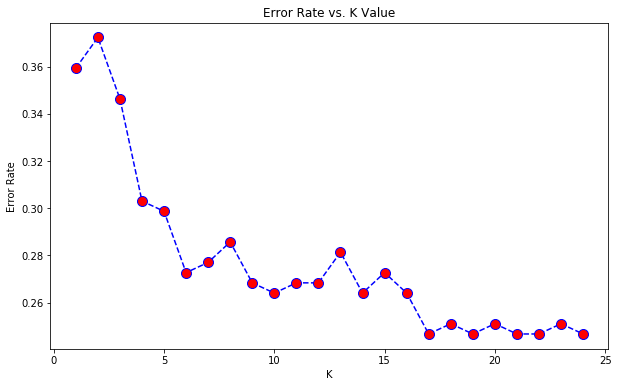

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

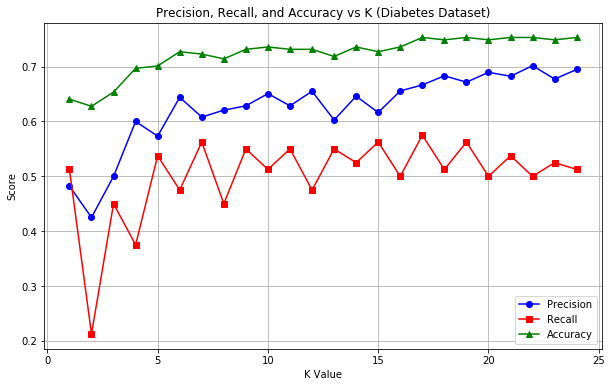

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25), precision_scores, marker='o', label='Precision', color='blue')
plt.plot(range(1,25), recall_scores, marker='s', label='Recall', color='red')
plt.plot(range(1,25), accuracy_scores, marker='^', label='Accuracy', color='green')

plt.title("Precision, Recall, and Accuracy vs K (Diabetes Dataset)")
plt.xlabel("K Value")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()
